## Observations and Insights 

In [39]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combinedData = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

# Display the data table for preview
combinedData.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [15]:
# Checking the number of mice.
miceCount = len(combinedData["Mouse ID"].unique())
miceCount

249

In [16]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateRows = combinedData[combinedData.duplicated(["Mouse ID", "Timepoint"])]
duplicateRows


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [17]:
# Optional: Get all the data for the duplicate mouse ID. 



In [18]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanData = combinedData.drop([909, 911, 913, 915, 917])
cleanData.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [19]:
# Checking the number of mice in the clean DataFrame.
cleanMiceCount = len(cleanData["Mouse ID"].unique())
cleanMiceCount

249

## Summary Statistics

In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drugGroup = cleanData.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]]
drugMean = drugGroup.mean().rename(columns={"Tumor Volume (mm3)": "Mean"})
drugMedian = drugGroup.median().rename(columns={"Tumor Volume (mm3)": "Median"})
drugVar = drugGroup.var().rename(columns={"Tumor Volume (mm3)": "Variance"})
drugStanDev = drugGroup.std().rename(columns={"Tumor Volume (mm3)": "Standard Deviation"})
drugSem = drugGroup.sem().rename(columns={"Tumor Volume (mm3)": "SEM"})
summaryTable = pd.concat([drugMean, drugMedian, drugVar, drugStanDev, drugSem], axis=1)
summaryTable

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [21]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
drugGroup.agg(["mean", "median", "var", "std", "sem"])

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

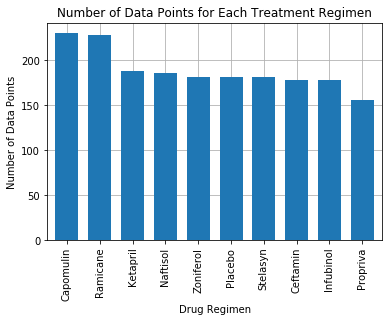

In [22]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
bar_plot = cleanData['Drug Regimen'].value_counts().plot.bar(width=0.7, zorder=3)

bar_plot.set_xlabel("Drug Regimen")
bar_plot.set_ylabel("Number of Data Points")
bar_plot.set_title("Number of Data Points for Each Treatment Regimen")

bar_plot.grid(zorder=0)

Text(0, 0.5, 'Total Measurements')

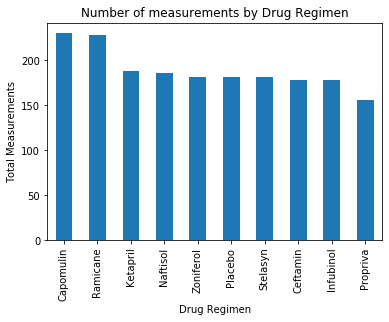

In [23]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drugMeasurements = cleanData["Drug Regimen"].value_counts()
drugMeasurements.plot.bar()

plt.title("Number of measurements by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Measurements")

Text(0, 0.5, '')

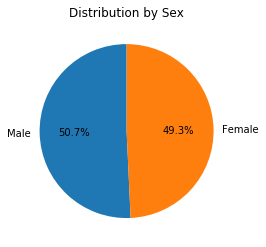

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
genderTotals = cleanData["Sex"].value_counts()

# Plot a pie chart filled with corresponding percentages and displayed vertically
piePlot = genderTotals.plot.pie(autopct="%1.1f%%", startangle=90, title='Distribution by Sex')

# Hide the 'y' label
piePlot.set_ylabel('')

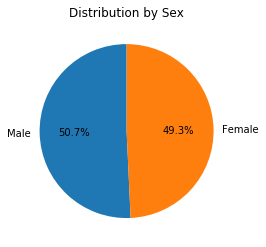

In [28]:
# Tell matplotlib to create a pie chart filled with corresponding percentages and displayed vertically
plt.pie(genderTotals, labels=genderTotals.index.values, autopct="%1.1f%%", startangle=90)
plt.title('Distribution by Sex')

# Display resulting plot
plt.show()

## Quartiles, Outliers and Boxplots

In [29]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
maxTpDf = pd.DataFrame(cleanData.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'max_timepoint'})
maxTpDf

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mergedDf = pd.merge(cleanData, maxTpDf, on='Mouse ID')
mergedDf.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,max_timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [30]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
drugValues = []


# Create empty list to fill with tumor vol data (for plotting)
for drug in drugs:
    
    tempDf = mergedDf.loc[mergedDf['Drug Regimen'] == drug]

    # Create subset dataframes that narrow down to rows only containing the final timepoint for each regimen
    finalVolumeDf = tempDf.loc[tempDf['Timepoint'] == tempDf['max_timepoint']]
    
    # Create a series that consists of all final volume values for each regimen
    values = finalVolumeDf['Tumor Volume (mm3)']
    drugValues.append(values)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'IQR for {drug}: {iqr}')
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    lowerBound = lowerq - (1.5*iqr)
    upperBound = upperq + (1.5*iqr)
    print(f'Lower Bound for {drug}: {lowerBound}')
    print(f'Upper Bound for {drug}: {upperBound}')
    
    outliersCount = (values.loc[(finalVolumeDf['Tumor Volume (mm3)'] >= upperBound) | 
                                        (finalVolumeDf['Tumor Volume (mm3)'] <= lowerBound)]).count()
    print(f'Number of {drug} outliers: {outliersCount}')
    

IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of Ramicane outliers: 0
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 1
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0


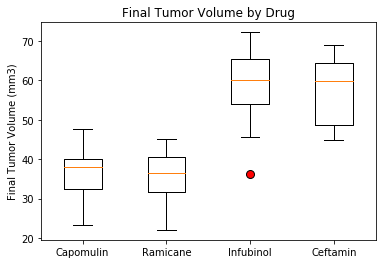

In [32]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
flierprops = dict(marker='o', markerfacecolor='r', markersize=8, markeredgecolor='black')

plt.boxplot(drugValues, flierprops=flierprops)

plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()


## Line and Scatter Plots

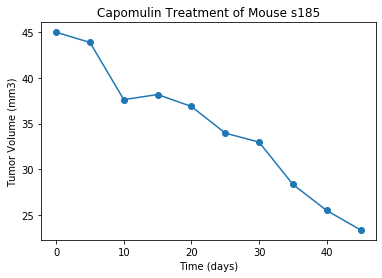

In [34]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse = cleanData.loc[cleanData['Mouse ID'] == 's185']

plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'], marker = 'o')

plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse s185")

plt.show()


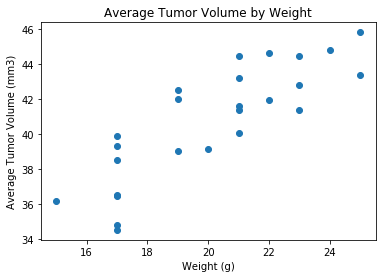

In [36]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulinDf = cleanData.loc[cleanData['Drug Regimen'] == 'Capomulin']


avgVolDf = pd.DataFrame(capomulinDf.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})

avgVolDf = pd.merge(capomulinDf, avgVolDf, on='Mouse ID')
finalAvgVolDf = avgVolDf[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
finalAvgVolDf

x = finalAvgVolDf['Weight (g)']
y = finalAvgVolDf['avg_tumor_vol']

plt.scatter(x, y)

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')

plt.show()


## Correlation and Regression

The correlation between weight and average tumor volume
on the Capomulin regimen is 0.84.


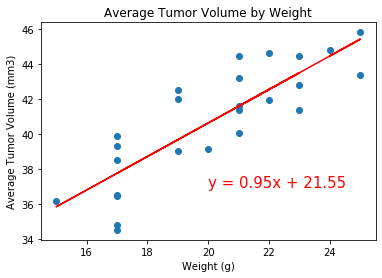

In [40]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(x,y)

print(f"""The correlation between weight and average tumor volume
on the Capomulin regimen is {round(correlation[0],2)}.""")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regressValues = x * slope + intercept
lineEq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regressValues,"r-")

plt.annotate(lineEq,(20,37),fontsize=15,color="red")

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()
